<h1>Speed Dating: Who to Date Long Term</h1>

What influences love at first sight? (Or, at least, love in the first four minutes?) This dataset was compiled by Columbia Business School professors Ray Fisman and Sheena Iyengar for their paper Gender Differences in Mate Selection: Evidence From a Speed Dating Experiment.<br>

Data was gathered from participants in experimental speed dating events from 2002-2004. During the events, the attendees would have a four minute "first date" with every other participant of the opposite sex. At the end of their four minutes, participants were asked if they would like to see their date again. They were also asked to rate their date on six attributes: Attractiveness, Sincerity, Intelligence, Fun, Ambition, and Shared Interests.<br>

The dataset also includes questionnaire data gathered from participants at different points in the process. These fields include: demographics, dating habits, self-perception across key attributes, beliefs on what others find valuable in a mate, and lifestyle information. See the Speed Dating Data Key document below for details.<br>

For more analysis from Iyengar and Fisman, read Racial Preferences in Dating.<br>

Data Exploration Ideas<br>

What are the least desirable attributes in a male partner? Does this differ for female partners?<br>
How important do people think attractiveness is in potential mate selection vs. its real impact?<br>
Are shared interests more important than a shared racial background?<br>
Can people accurately predict their own perceived value in the dating market?<br>
In terms of getting a second date, is it better to be someone's first speed date of the night or their last?

In [1]:
import pandas as pd
import numpy as np
import sklearn
from IPython.display import display
%matplotlib inline

print('pandas version is {}.'.format(pd.__version__))
print('numpy version is {}.'.format(np.__version__))
print('scikit-learn version is {}.'.format(sklearn.__version__))

pandas version is 0.18.0.
numpy version is 1.10.4.
scikit-learn version is 0.17.1.


In [2]:
data = pd.read_csv("Speed Dating Data.csv")
print "This set has {} data points and {} features.".format(*data.shape)

This set has 8378 data points and 195 features.


<h1>Data Exploration</h1>

In [3]:
import features_creator as fc #importing feature names made in file features_creator.py

In [4]:
unique = data.copy()
unique.drop_duplicates(subset = 'iid', keep = 'first', inplace = True)

In [5]:
#for i in fc.clean_up_2:
#    unique[i].replace(to_replace = 12.0, value = 10.0, inplace = True)

In [6]:
#unique[fc.clean_up_2].describe()

In [7]:
#for i, j in fc.master_list.iteritems():
#    stuff = pd.DataFrame(data = unique, columns = ['iid', 'wave', 'gender'] + j)
#    new_frame = stuff[stuff['gender'] == 0].copy()
#    new_frame.drop(labels = ['iid', 'gender', 'wave'], axis = 1, inplace = True)
#    for i in new_frame.columns:
#        new_frame[i] = (new_frame[i] - new_frame[i].min()) / (new_frame[i].max() - new_frame[i].min())
    #display(new_frame.describe())
    #new_frame.hist(bins = 10, figsize = (15, 5))

<h2>Clean up People Matched Entries</h2>

In [8]:
people_matched = data[data['match'] == 1].copy()
people_matched.drop_duplicates(subset = 'iid', keep = 'first', inplace = True)
for i in fc.clean_up_2:
    people_matched[i].replace(to_replace = 12.0, value = 10.0, inplace = True)
#display(people_matched)

<h2>Get Index for 'iid' for non-matches</h2>

In [9]:
not_ever_matched = []
number = []
for i in people_matched['iid']:
    number.append(int(i))
for i in range(1, 553):
    if i not in number:
        not_ever_matched.append(i)

In [10]:
for i in not_ever_matched:
    print i,
#not_ever_matched = np.int64(not_ever_matched)

3 11 21 24 25 26 32 33 40 41 42 54 59 65 68 72 73 88 96 101 111 118 121 123 124 131 133 139 143 145 158 170 177 182 189 198 203 204 209 216 222 234 236 247 249 254 255 257 262 267 272 278 286 287 295 298 302 314 318 320 321 327 329 331 334 347 405 418 425 427 430 440 443 444 451 454 455 457 459 461 463 465 466 477 479 483 487 497 498 502 503 506 514 517 519 520 525 527 528 543


In [11]:
people_not_matched = data[data.index.isin(not_ever_matched)].copy()

<h2>Non-Matched Females: Graphs</h2>

C:\Users\Henry\Anaconda2\lib\site-packages\matplotlib\pyplot.py:516: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


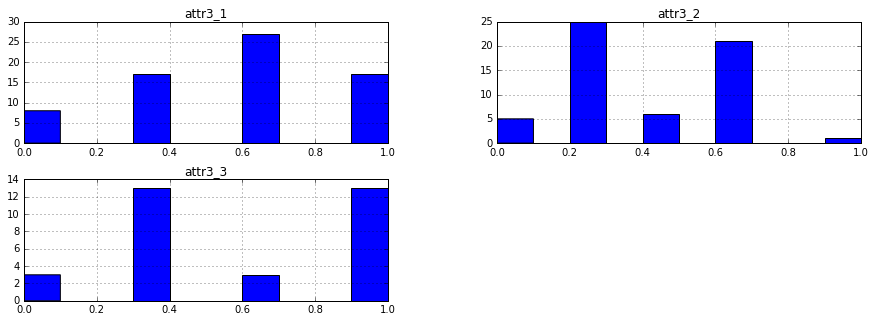

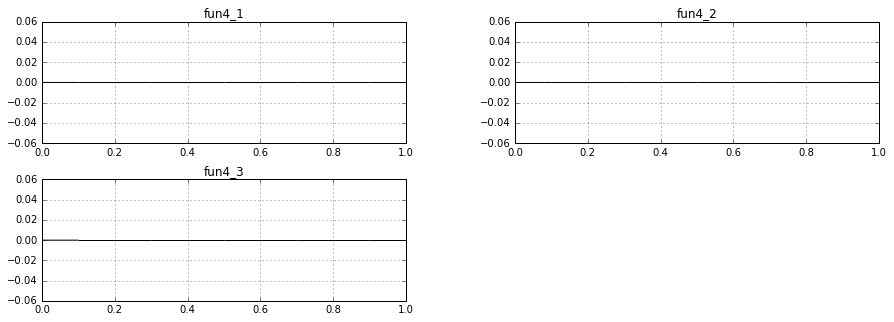

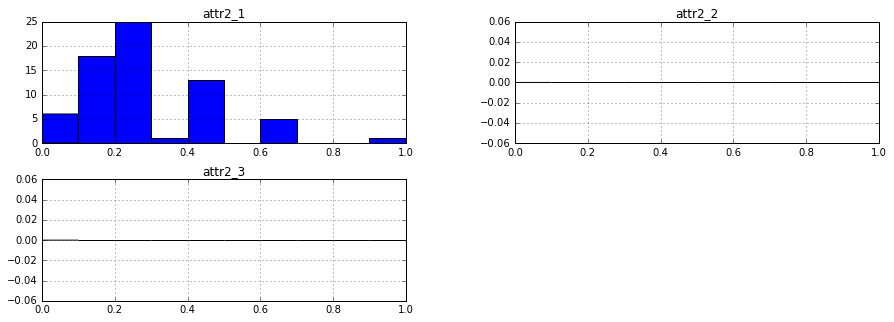

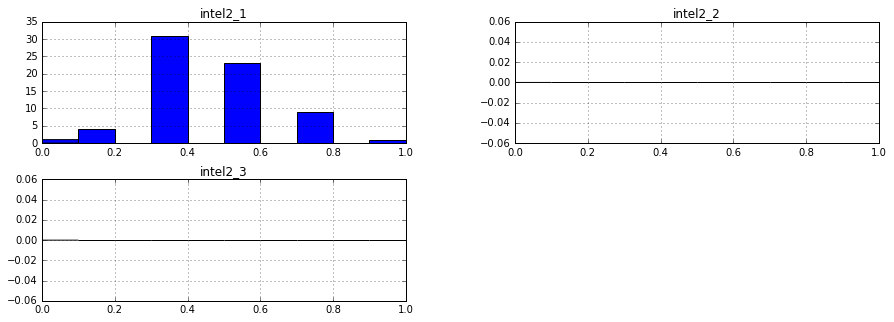

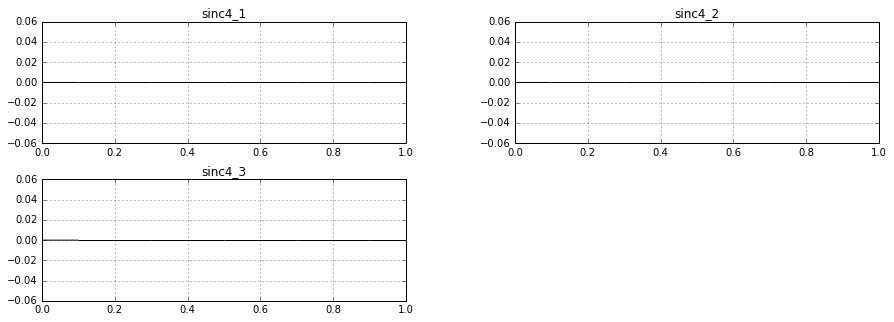

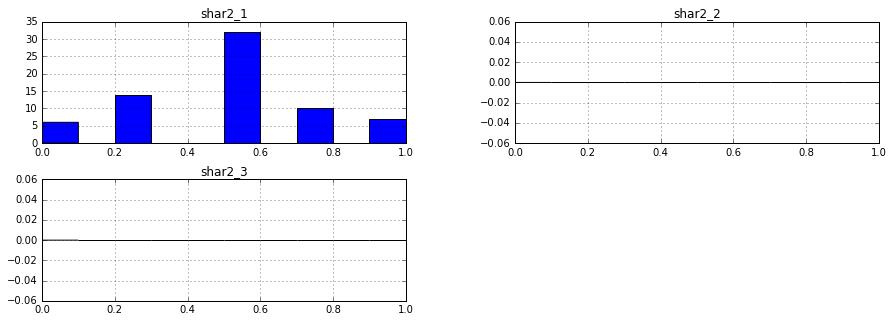

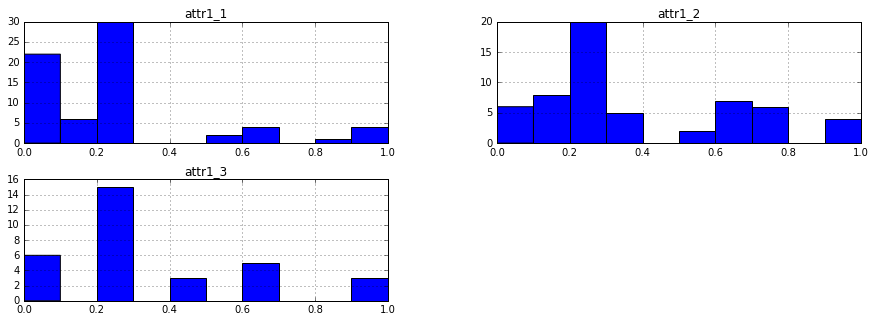

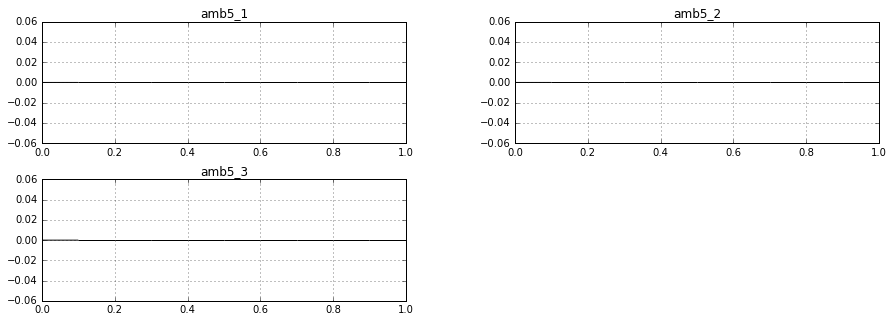

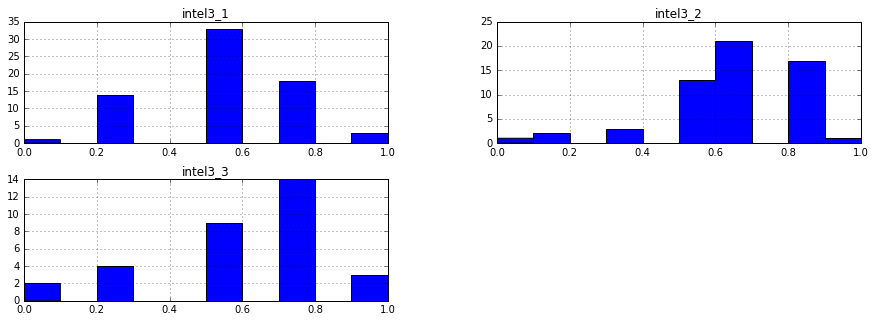

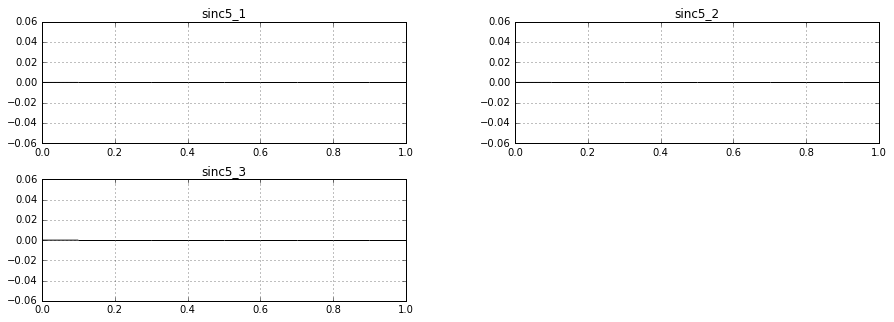

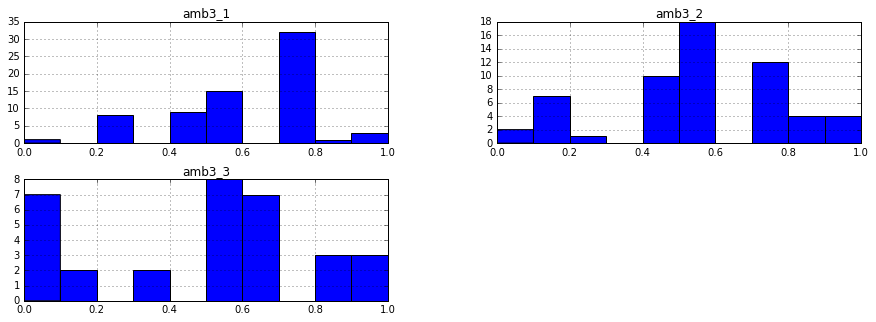

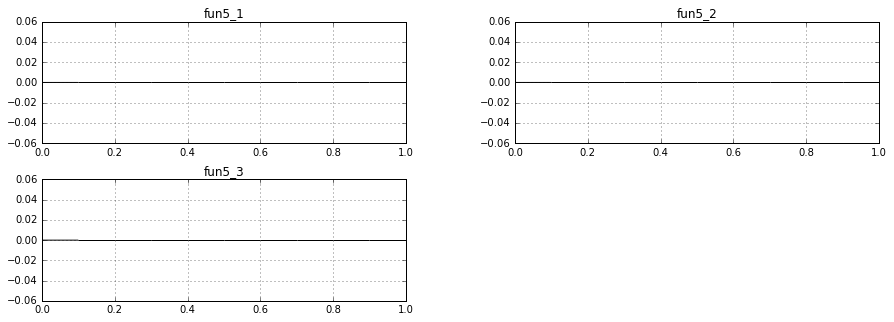

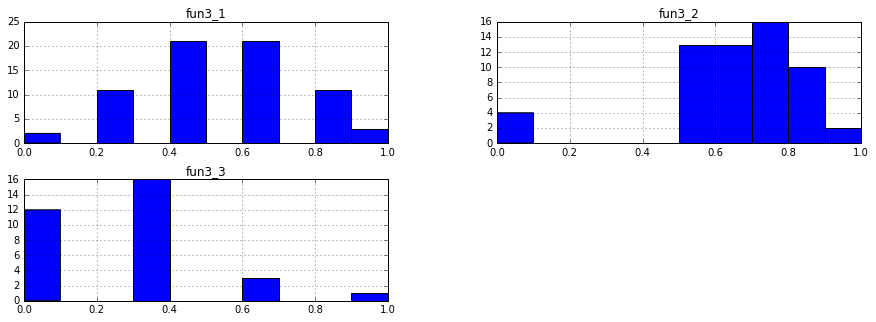

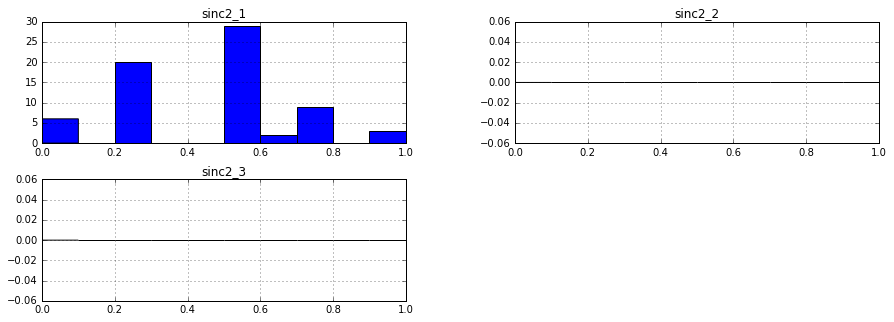

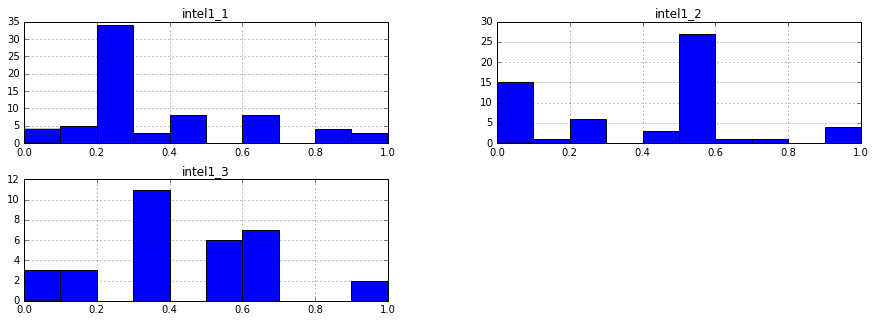

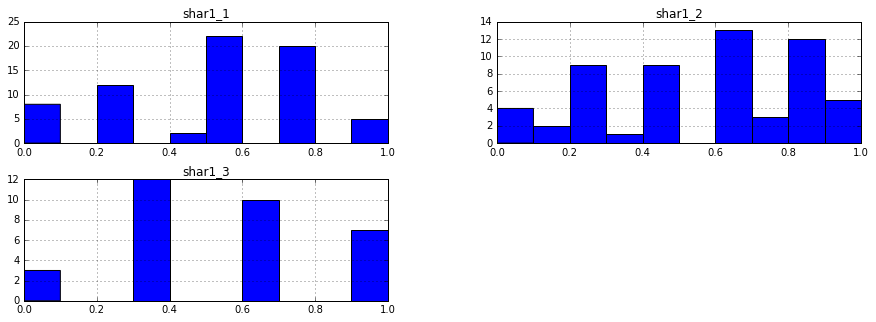

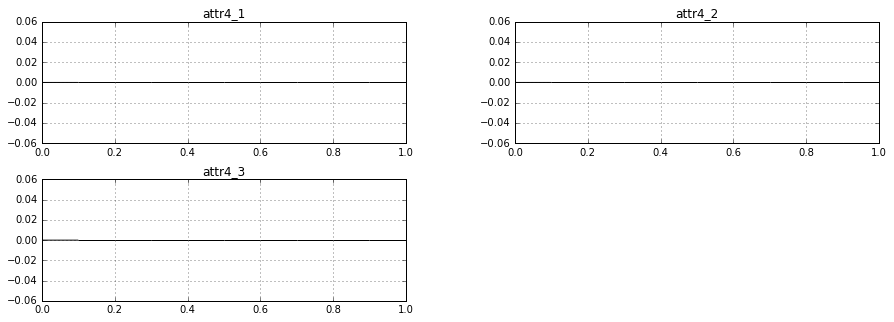

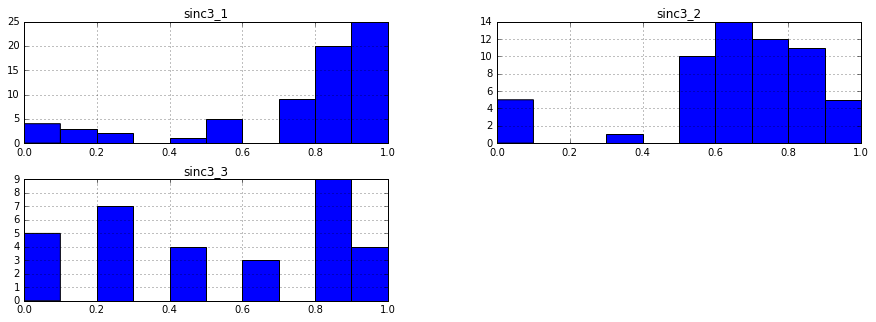

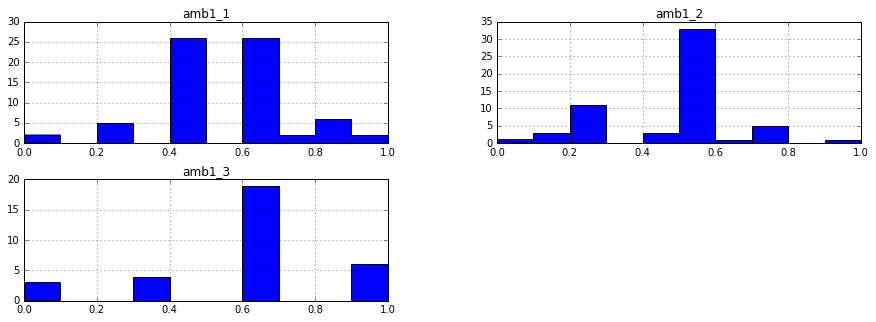

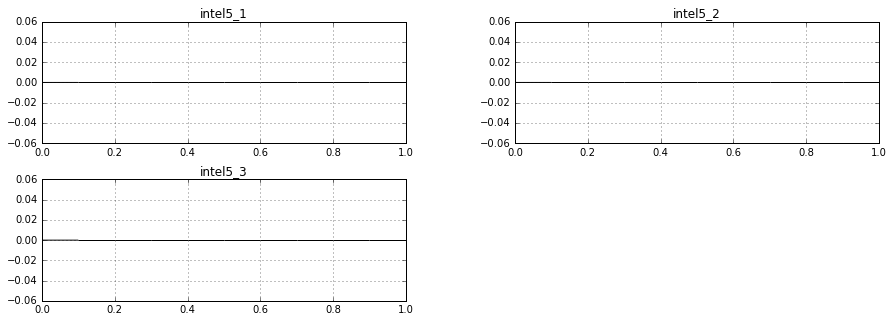

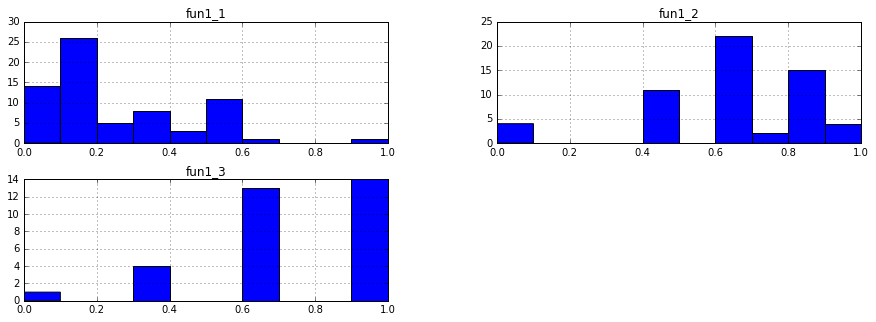

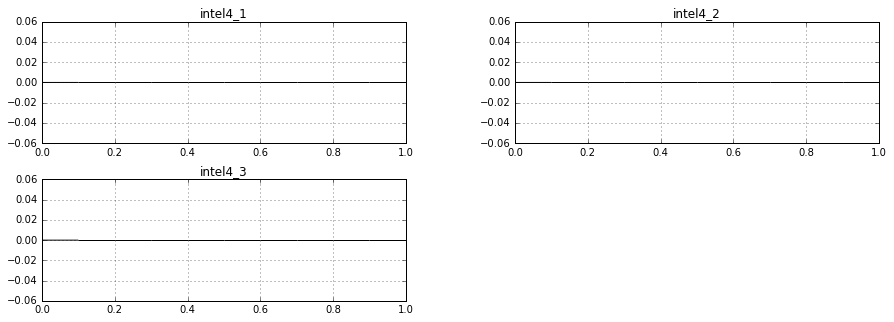

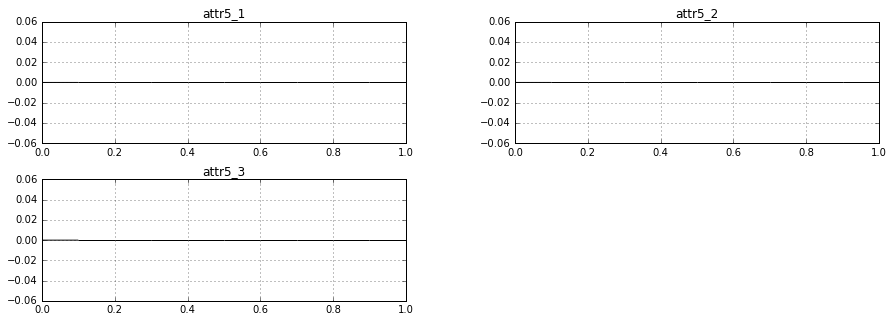

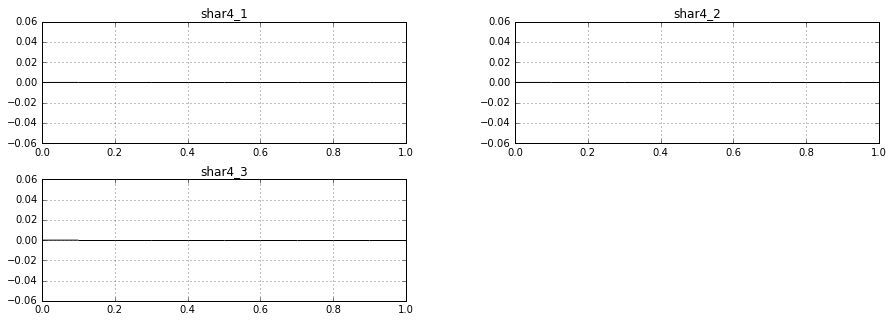

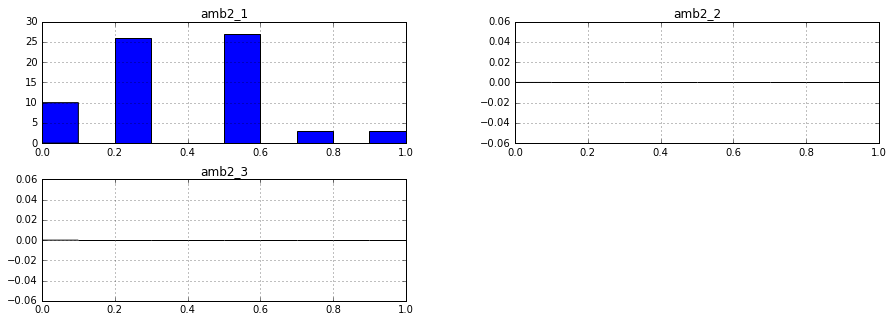

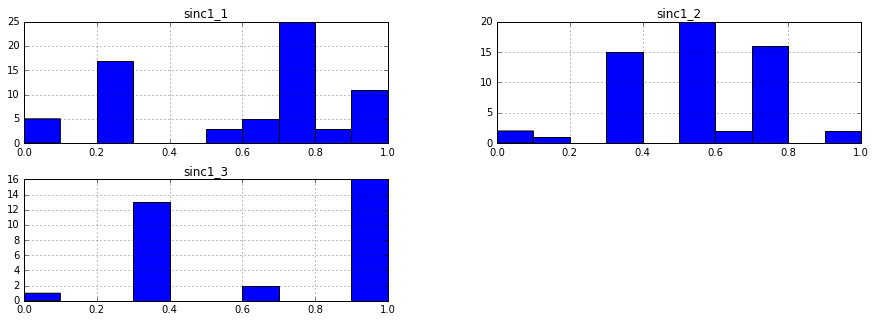

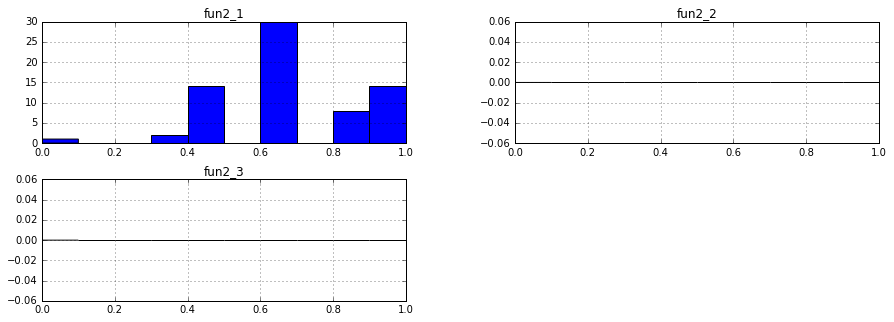

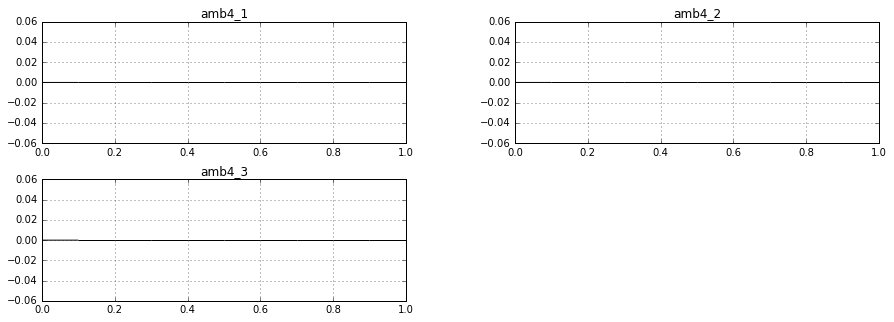

In [12]:
for i, j in fc.master_list.iteritems():
    stuff = pd.DataFrame(data = people_not_matched, columns = ['iid', 'wave', 'gender'] + j)
    new_frame = stuff[stuff['gender'] == 0].copy()
    new_frame.drop(labels = ['iid', 'gender', 'wave'], axis = 1, inplace = True)
    for i in new_frame.columns:
        new_frame[i] = (new_frame[i] - new_frame[i].min()) / (new_frame[i].max() - new_frame[i].min())
    #display(new_frame.describe())
    new_frame.hist(bins = 10, figsize = (15, 5))

<h2>Non-Matched Males: Graphs</h2>

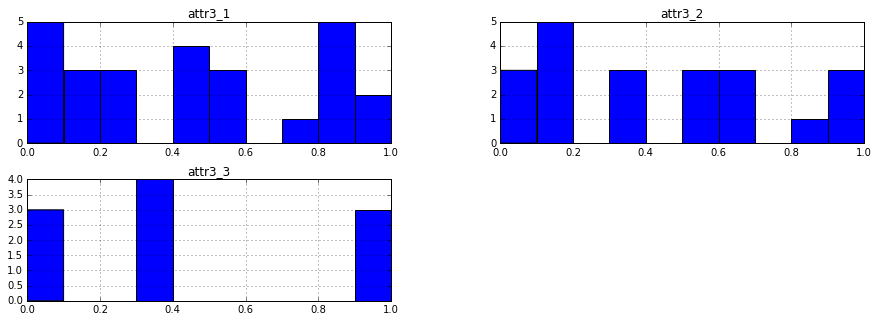

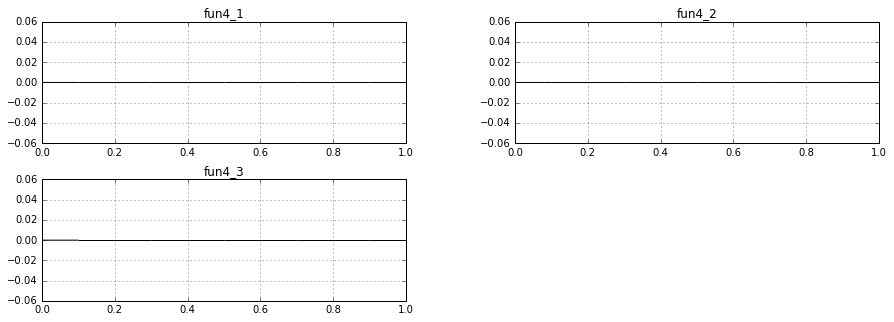

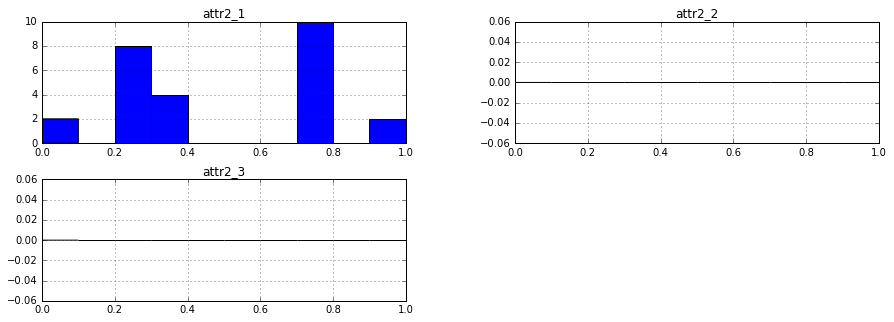

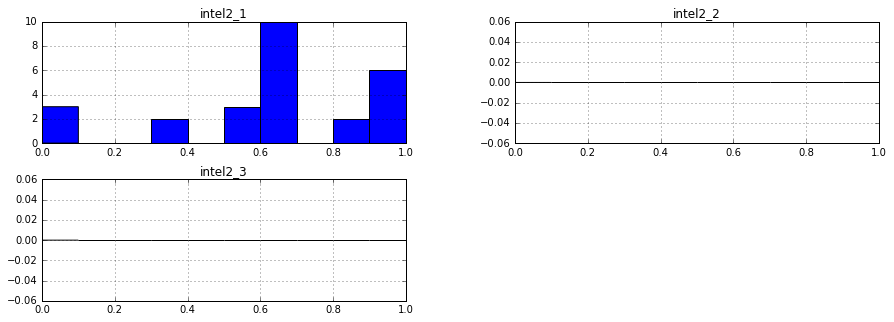

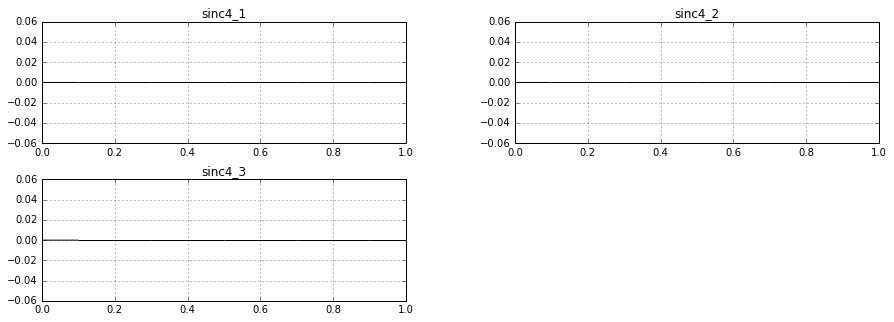

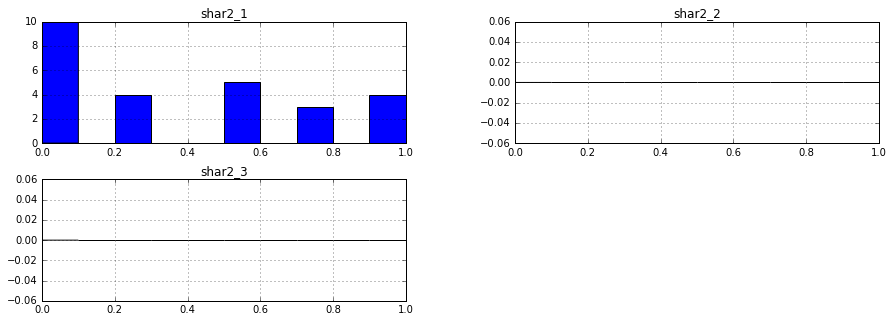

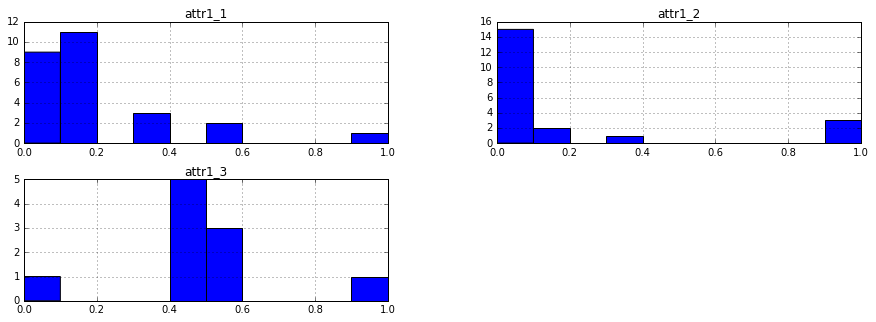

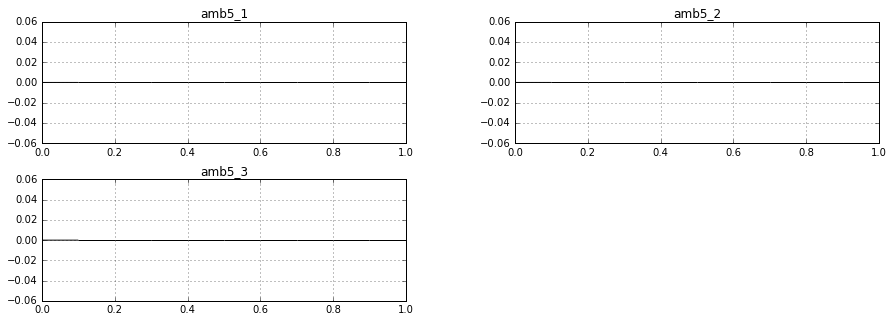

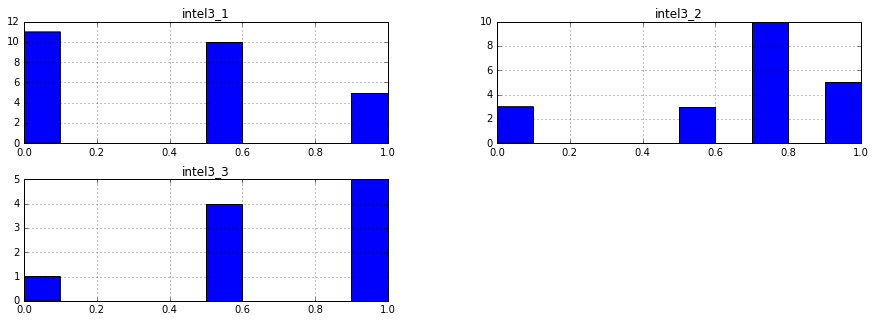

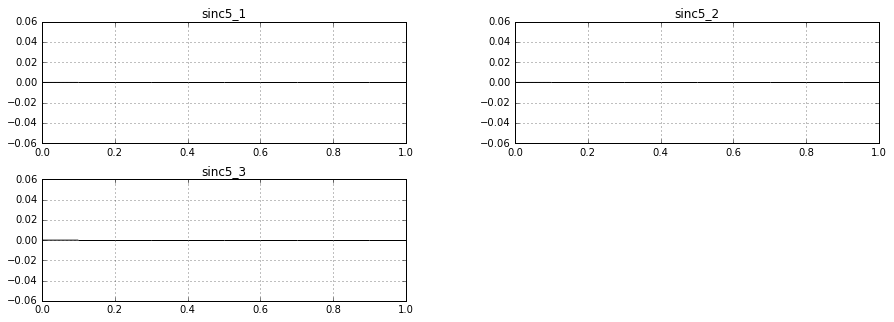

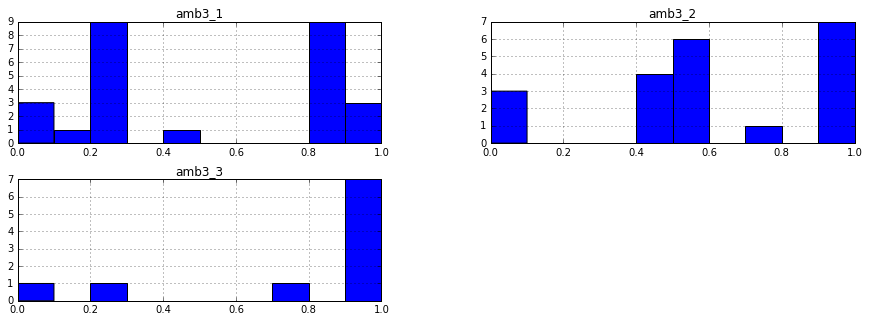

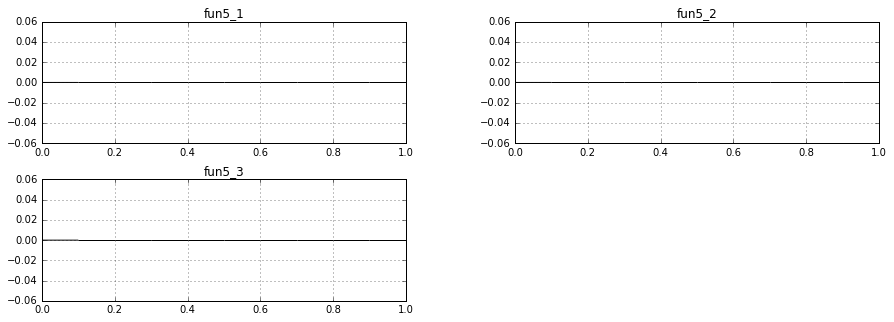

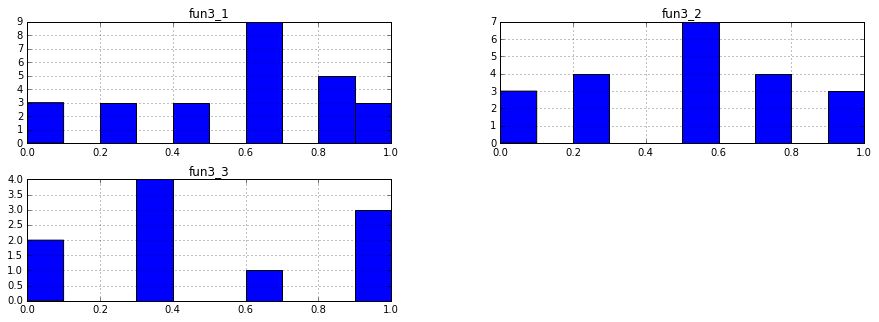

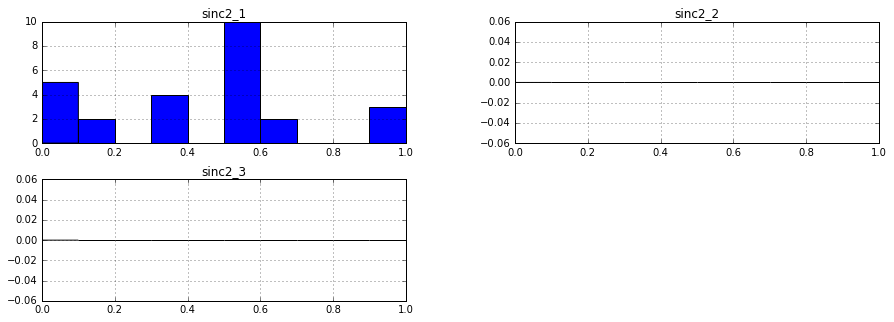

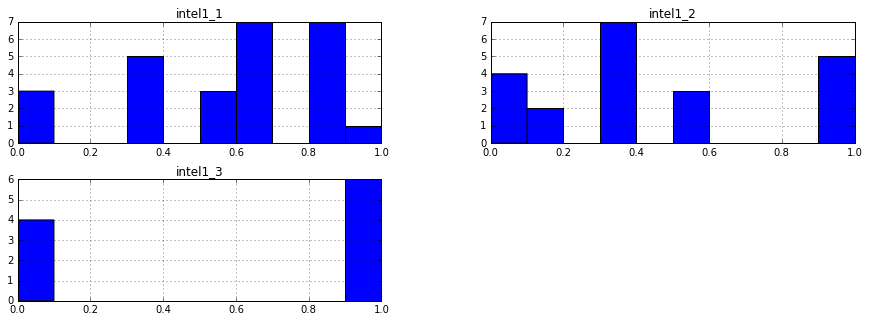

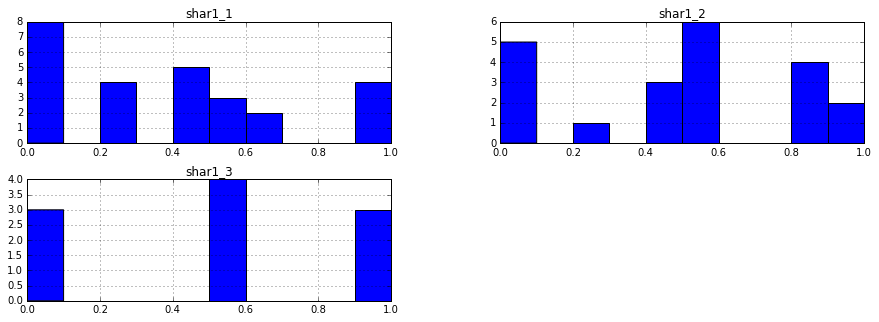

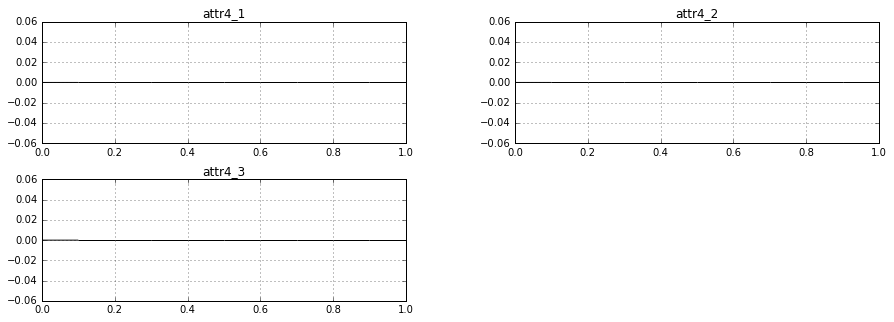

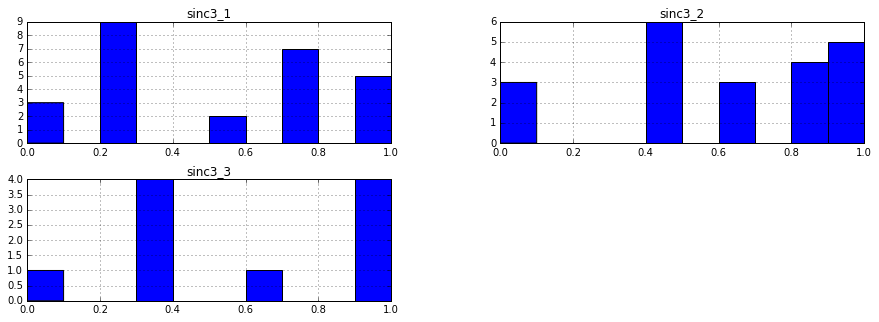

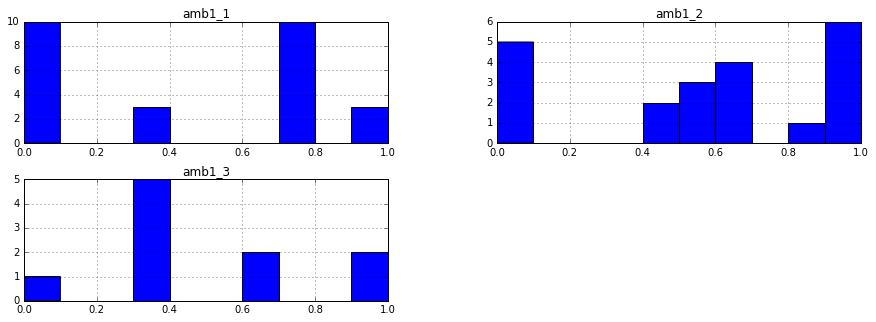

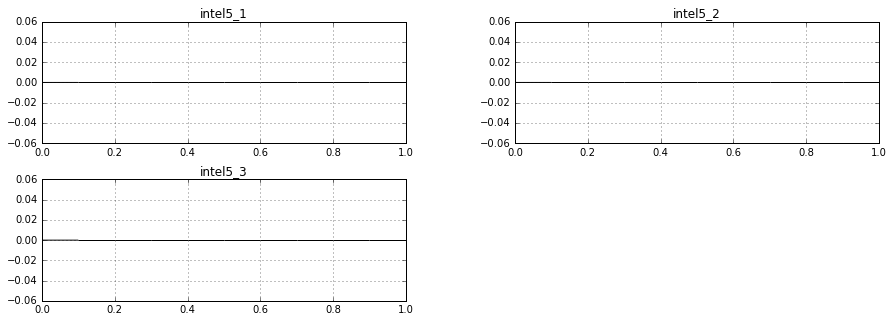

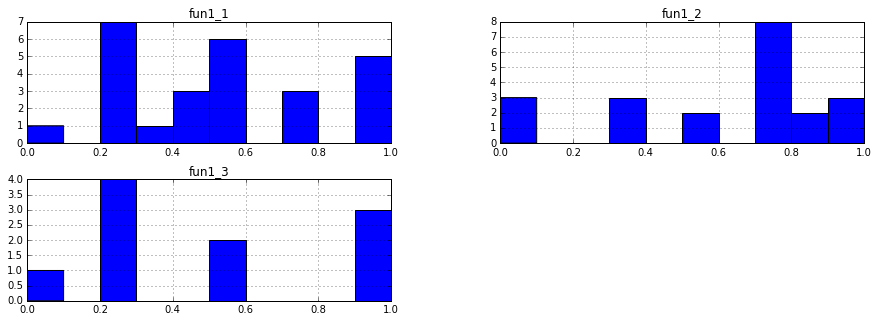

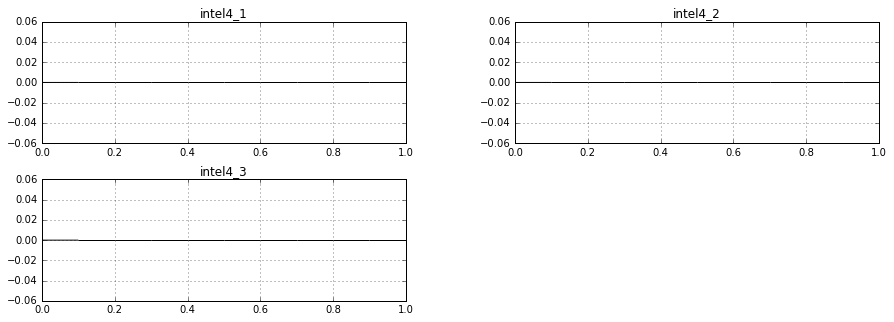

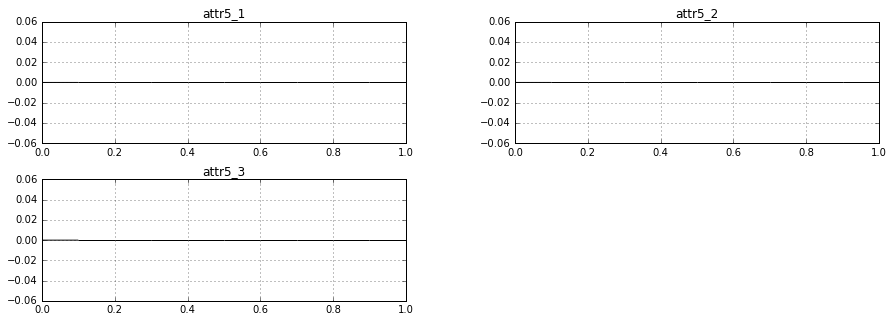

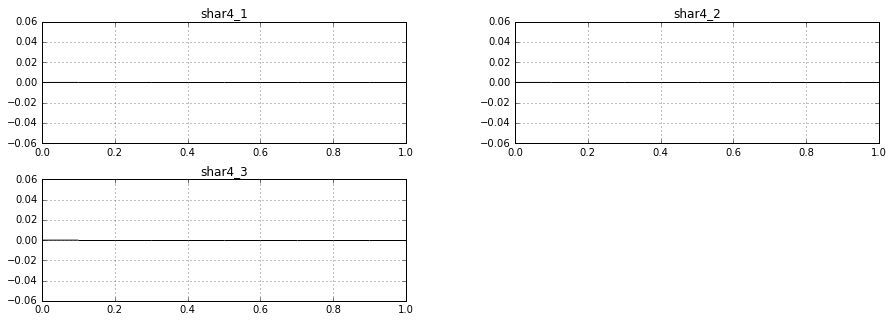

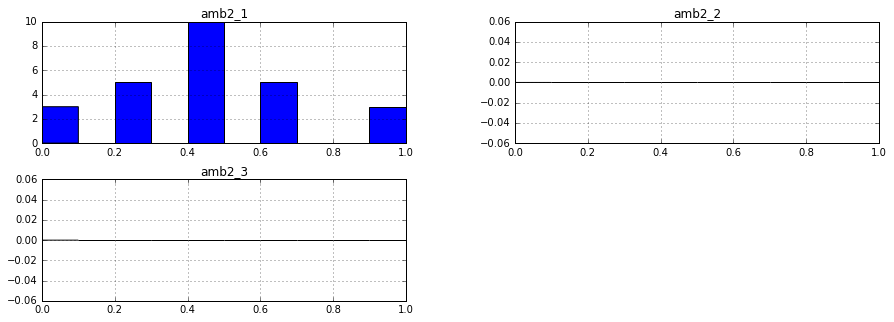

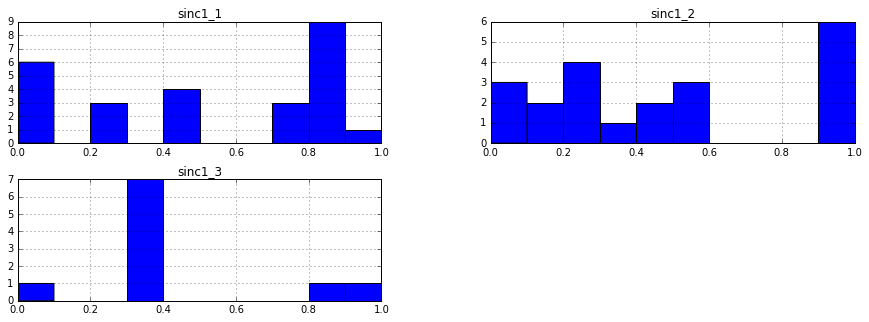

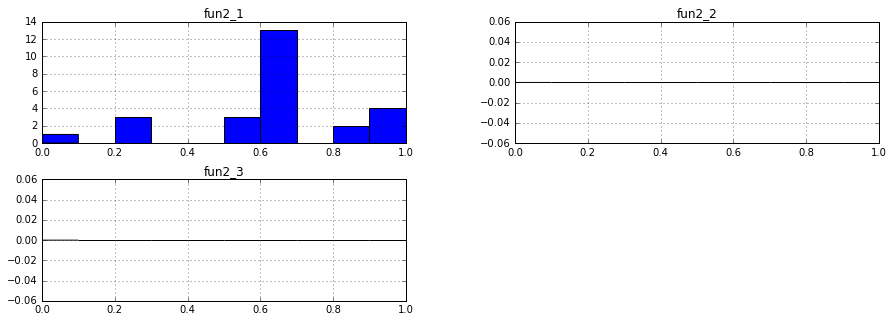

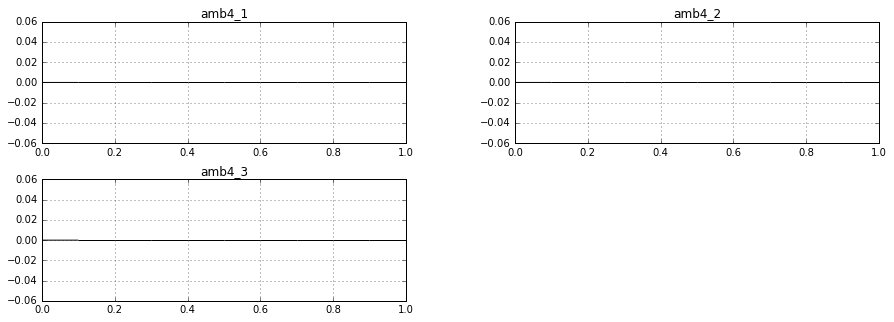

In [13]:
for i, j in fc.master_list.iteritems():
    stuff = pd.DataFrame(data = people_not_matched, columns = ['iid', 'wave', 'gender'] + j)
    new_frame = stuff[stuff['gender'] == 1].copy()
    new_frame.drop(labels = ['iid', 'gender', 'wave'], axis = 1, inplace = True)
    for i in new_frame.columns:
        new_frame[i] = (new_frame[i] - new_frame[i].min()) / (new_frame[i].max() - new_frame[i].min())
    #display(new_frame.describe())
    new_frame.hist(bins = 10, figsize = (15, 5))

In [22]:
non_matches_decision_investigation = [i for i in fc.features_of_attraction]
non_matches_decision_investigation.append('dec')
non_matches_decision_investigation.append('dec_o')
non_matches_decision_investigation.append('match')
people_not_matched[non_matches_decision_investigation]

,attr,sinc,intel,fun,amb,shar,dec,dec_o,match
3,7.0,6.0,8.0,7.0,6.0,8.0,1,1,1
11,8.0,5.0,6.0,6.0,9.0,6.0,0,0,0
21,9.0,7.0,9.0,8.0,9.0,7.0,0,0,0
24,9.0,10.0,10.0,10.0,10.0,10.0,0,1,0
25,8.0,10.0,10.0,7.0,9.0,9.0,0,1,0
26,8.0,9.0,10.0,7.0,7.0,9.0,0,0,0
32,4.0,7.0,8.0,8.0,6.0,7.0,0,1,0
33,8.0,10.0,7.0,10.0,7.0,10.0,1,1,1
40,5.0,8.0,8.0,2.0,2.0,2.0,0,0,0
41,8.0,6.0,6.0,5.0,5.0,5.0,0,0,0


<h1>Features</h1>

In [14]:
for i, j in fc.data_cleaner.iteritems():
    print i, j, '\n'
for i, j in fc.master_list.items():
    print i, j, '\n'
print 'clean_up_1', '\n', fc.clean_up_1, '\n'
print 'clean_up_2', '\n', fc.clean_up_2, '\n'
print 'clean_up_3', '\n', fc.clean_up_3, '\n'
print 'clean_up_4', '\n', fc.clean_up_4, '\n'
print 'clean_up_5', '\n', fc.clean_up_5, '\n'

first_round ['attr1_1', 'sinc1_1', 'intel1_1', 'fun1_1', 'amb1_1', 'shar1_1', 'attr2_1', 'sinc2_1', 'intel2_1', 'fun2_1', 'amb2_1', 'shar2_1', 'attr3_1', 'sinc3_1', 'intel3_1', 'fun3_1', 'amb3_1', 'attr4_1', 'sinc4_1', 'intel4_1', 'fun4_1', 'amb4_1', 'shar4_1', 'attr5_1', 'sinc5_1', 'intel5_1', 'fun5_1', 'amb5_1'] 

second_round ['attr1_2', 'sinc1_2', 'intel1_2', 'fun1_2', 'amb1_2', 'shar1_2', 'attr2_2', 'sinc2_2', 'intel2_2', 'fun2_2', 'amb2_2', 'shar2_2', 'attr3_2', 'sinc3_2', 'intel3_2', 'fun3_2', 'amb3_2', 'attr4_2', 'sinc4_2', 'intel4_2', 'fun4_2', 'amb4_2', 'shar4_2', 'attr5_2', 'sinc5_2', 'intel5_2', 'fun5_2', 'amb5_2'] 

third_round ['attr1_3', 'sinc1_3', 'intel1_3', 'fun1_3', 'amb1_3', 'shar1_3', 'attr2_3', 'sinc2_3', 'intel2_3', 'fun2_3', 'amb2_3', 'shar2_3', 'attr3_3', 'sinc3_3', 'intel3_3', 'fun3_3', 'amb3_3', 'attr4_3', 'sinc4_3', 'intel4_3', 'fun4_3', 'amb4_3', 'shar4_3', 'attr5_3', 'sinc5_3', 'intel5_3', 'fun5_3', 'amb5_3'] 

how_you_measure_attr ['attr3_1', 'attr3_2', '